In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import GridSearchCV as gsCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [2]:
#read in data
dfmain = pd.read_csv('IDS_Dataset_Group_75.csv')
dfmain

,Id,gender,age,nationality,sport,ind-university_grade,ind-debateclub,ind-programming_exp,ind-international_exp,ind-entrepeneur_exp,ind-languages,ind-exact_study,ind-degree,company,decision
0,x6077a,male,26,German,Golf,67,False,True,False,False,2,True,bachelor,A,False
1,x2173b,male,24,Dutch,Cricket,70,False,True,False,False,1,True,master,A,True
2,x6241a,female,26,German,Golf,59,False,False,False,False,1,False,master,A,True
3,x5785d,female,27,Dutch,Tennis,63,True,True,False,False,2,True,bachelor,A,False
4,x9859f,male,28,Dutch,Cricket,63,False,True,True,False,1,False,phd,A,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,x8998a,male,27,Dutch,Cricket,76,True,True,False,False,2,True,master,A,True
280,x3664a,male,28,Dutch,Tennis,68,True,False,False,True,3,False,master,A,True
281,x2659d,male,30,Dutch,Tennis,54,True,False,False,True,2,False,bachelor,A,False
282,x3164f,male,28,Dutch,Cricket,57,False,False,False,False,1,False,bachelor,A,False


In [3]:
#Describe the data
print(dfmain.describe())
print("=====================================================================================================")
print(dfmain.shape)


              age  ind-university_grade  ind-languages
count  284.000000            284.000000     284.000000
mean    26.471831             62.820423       1.306338
std      2.964319              5.593358       0.743282
min     21.000000             49.000000       0.000000
25%     24.000000             58.000000       1.000000
50%     27.000000             63.000000       1.000000
75%     28.000000             67.000000       2.000000
max     32.000000             76.000000       3.000000
(284, 15)


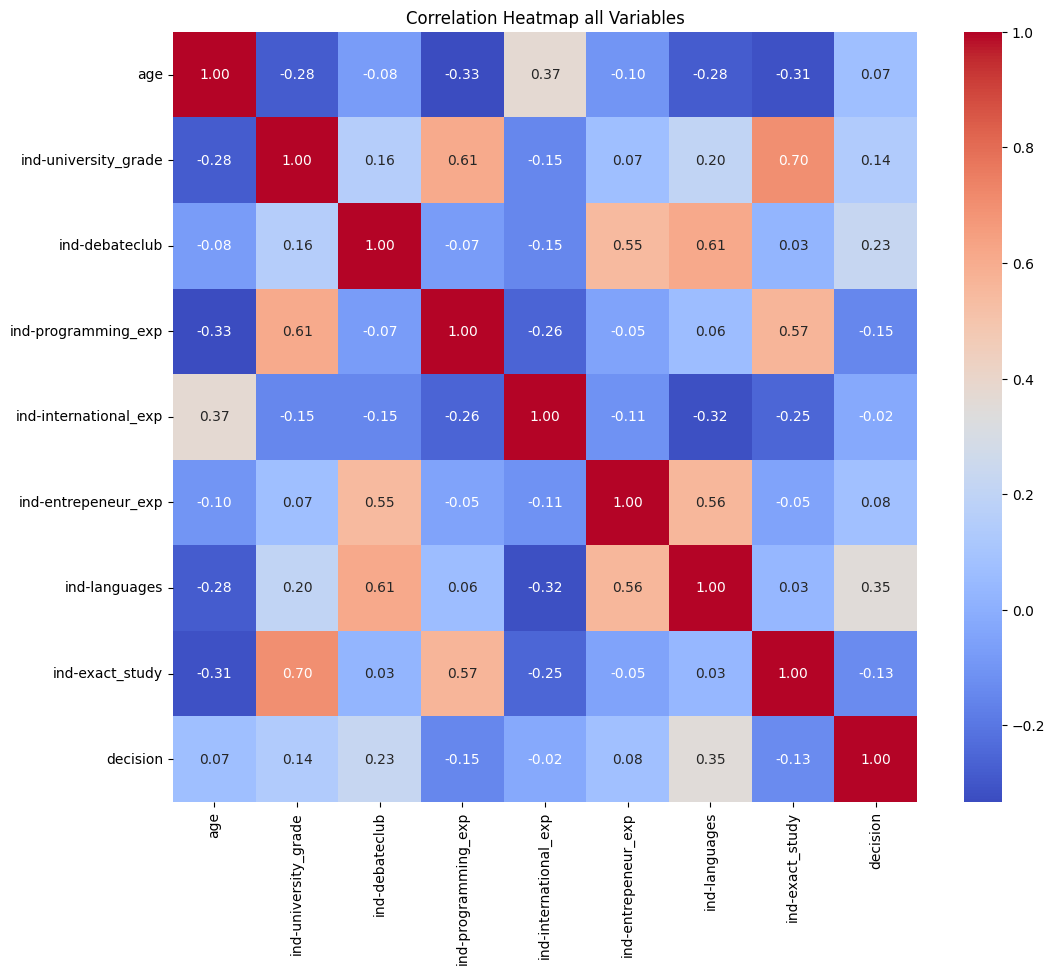

In [439]:
### Heatmap cross-correlation all numerical variables
# Convert boolean columns to int
bool_cols = dfmain.select_dtypes(include=[bool]).columns
dfmain[bool_cols] = dfmain[bool_cols].astype(int)

# Select numeric columns (now inc bool converted to int)
numeric_cols = dfmain.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap all Variables')
plt.show()

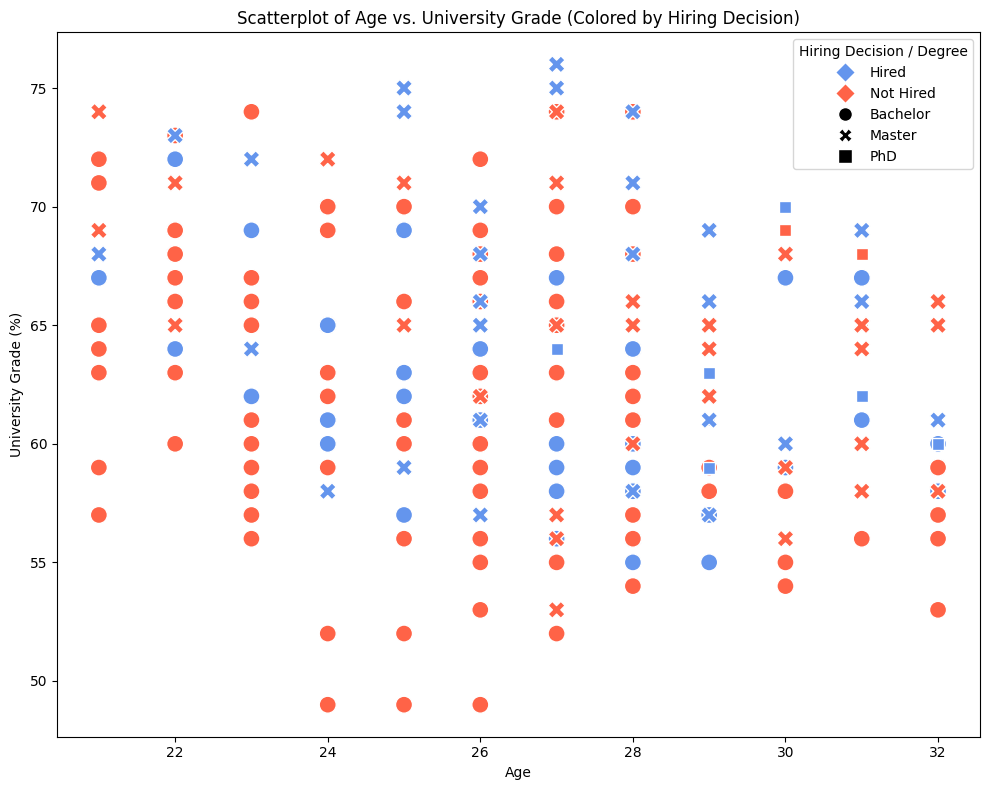

In [440]:
### Scatterplot Age vs Grade (Hiring decision + Gender)
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x='age', y='ind-university_grade', hue='decision', hue_order=[True, False], style='ind-degree',
                        palette={True: '#6495ED', False: '#FF6347'}, data=dfmain, legend=False, s=150)
plt.title('Scatterplot of Age vs. University Grade (Colored by Hiring Decision)')
plt.xlabel('Age')
plt.ylabel('University Grade (%)')

legend_labels = ['Hired', 'Not Hired', 'Bachelor', 'Master', 'PhD']
legend_hired = plt.Line2D([0], [0], marker='D', color='w', markerfacecolor='#6495ED', markersize=10)
legend_not_hired = plt.Line2D([0], [0], marker='D', color='w', markerfacecolor='#FF6347', markersize=10)
legend_bachelor = plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='black', markersize=10)
legend_master = plt.Line2D([0], [0], marker='X', color='w', markerfacecolor='black', markersize=10)
legend_phd = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10)

plt.legend(handles=[legend_hired, legend_not_hired, legend_phd, legend_master, legend_bachelor],
        labels=legend_labels, title='Hiring Decision / Degree', bbox_to_anchor=(1, 1), loc='upper right')

plt.tight_layout()
plt.show()

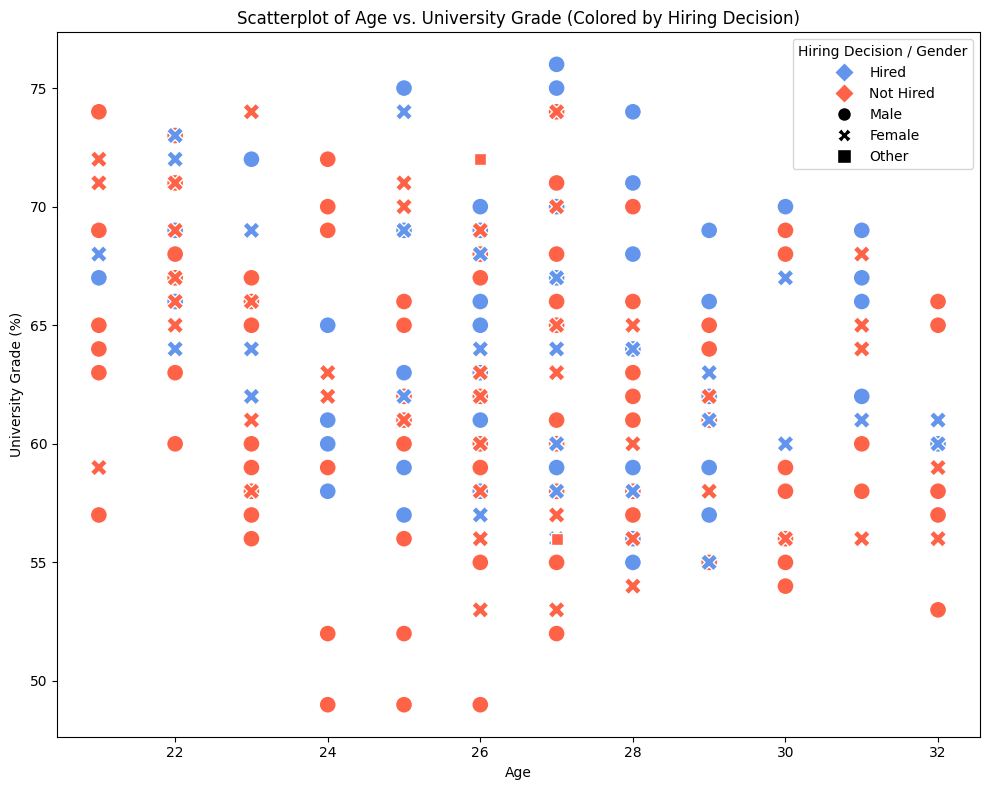

In [441]:
### Scatterplot Age vs Grade (Hiring decision + Degree)
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x='age', y='ind-university_grade', hue='decision', hue_order=[True, False], style='gender',
                          palette={True: '#6495ED', False: '#FF6347'}, data=dfmain, legend=False, s=150)
plt.title('Scatterplot of Age vs. University Grade (Colored by Hiring Decision)')
plt.xlabel('Age')
plt.ylabel('University Grade (%)')

# legend
legend_labels = ['Hired', 'Not Hired', 'Male', 'Female', 'Other']
legend_hired = plt.Line2D([0], [0], marker='D', color='w', markerfacecolor='#6495ED', markersize=10)
legend_not_hired = plt.Line2D([0], [0], marker='D', color='w', markerfacecolor='#FF6347', markersize=10)
legend_male = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10)
legend_female = plt.Line2D([0], [0], marker='X', color='w', markerfacecolor='black', markersize=10)
legend_other = plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='black', markersize=10)


plt.legend(handles=[legend_hired, legend_not_hired, legend_male, legend_female, legend_other],
           labels=legend_labels, title='Hiring Decision / Gender', bbox_to_anchor=(1, 1), loc='upper right')
plt.tight_layout()
plt.show()

In [442]:
df = dfmain.copy()

###################### All four experiences ######################

df['all-at-once'] = np.where((df['ind-programming_exp'] == True) & (df['ind-entrepeneur_exp'] == True) & (df['ind-international_exp'] == True) & (df['ind-debateclub'] == True), True, False)

###################### Exactly three experiences ######################

df['prog-entrepeneur-international'] = np.where((df['ind-programming_exp'] == True)
                                                & (df['ind-entrepeneur_exp'] == True) 
                                                & (df['ind-international_exp'] == True)
                                                & (df['ind-debateclub'] == False), True, False)
df['prog-entrepeneur-debate'] = np.where((df['ind-programming_exp'] == True)
                                                & (df['ind-entrepeneur_exp'] == True) 
                                                & (df['ind-international_exp'] == False)
                                                & (df['ind-debateclub'] == True), True, False)
df['prog-international-debate'] = np.where((df['ind-programming_exp'] == True)
                                                & (df['ind-entrepeneur_exp'] == False) 
                                                & (df['ind-international_exp'] == True)
                                                & (df['ind-debateclub'] == True), True, False)
df['entrepeneur-international-debate'] = np.where((df['ind-programming_exp'] == False)
                                                & (df['ind-entrepeneur_exp'] == True) 
                                                & (df['ind-international_exp'] == True)
                                                & (df['ind-debateclub'] == True), True, False)

###################### Exactly two experiences ######################

df['programming-entrepeneur'] = np.where((df['ind-programming_exp'] == True) 
                                                & (df['ind-entrepeneur_exp'] == True) 
                                                & (df['ind-international_exp'] == False)
                                                & (df['ind-debateclub'] == False ), True, False)
df['programming-international'] = np.where((df['ind-programming_exp'] == True)
                                                & (df['ind-entrepeneur_exp'] == False) 
                                                & (df['ind-international_exp'] == True) 
                                                & (df['ind-debateclub'] == False), True, False)
df['programming-debate'] = np.where((df['ind-programming_exp'] == True)
                                                & (df['ind-entrepeneur_exp'] == False) 
                                                & (df['ind-international_exp'] == False) 
                                                & (df['ind-debateclub'] == False), True, False)
df['entrepeneur-international'] = np.where((df['ind-programming_exp'] == False)
                                                & (df['ind-entrepeneur_exp'] == True) 
                                                & (df['ind-international_exp'] == True) 
                                                & (df['ind-debateclub'] == False), True, False)
df['entrepeneur-debate'] = np.where((df['ind-programming_exp'] == False)
                                                & (df['ind-entrepeneur_exp'] == True) 
                                                & (df['ind-international_exp'] == False) 
                                                & (df['ind-debateclub'] == True), True, False)
df['international-debate'] = np.where((df['ind-programming_exp'] == False)
                                                & (df['ind-entrepeneur_exp'] == True) 
                                                & (df['ind-international_exp'] == False) 
                                                & (df['ind-debateclub'] == True), True, False)

###################### No experience or only one experience ######################

df['no_experience'] = np.where((df['ind-programming_exp'] == False) 
                                                & (df['ind-entrepeneur_exp'] == False) 
                                                & (df['ind-international_exp'] == False) 
                                                & (df['ind-debateclub'] == False), True, False)
df['only_programming'] = np.where((df['ind-programming_exp'] == True) 
                                                & (df['ind-entrepeneur_exp'] == False) 
                                                & (df['ind-international_exp'] == False) 
                                                & (df['ind-debateclub'] == False), True, False)
df['only_entrepeneur'] = np.where((df['ind-programming_exp'] == False) 
                                                & (df['ind-entrepeneur_exp'] == True) 
                                                & (df['ind-international_exp'] == False) 
                                                & (df['ind-debateclub'] == False) , True, False)
df['only_international'] = np.where((df['ind-programming_exp'] == False) 
                                                & (df['ind-entrepeneur_exp'] == False) 
                                                & (df['ind-international_exp'] == True) 
                                                & (df['ind-debateclub'] == False), True, False)
df['only_debate'] = np.where((df['ind-programming_exp'] == False) 
                                                & (df['ind-entrepeneur_exp'] == False) 
                                                & (df['ind-international_exp'] == True) 
                                                & (df['ind-debateclub'] == False), True, False)

In [443]:
#create an empty dataframe for the purpose of graphing specific experiences
df_exp = pd.DataFrame(columns=['experiences', 'acceptance_rate', 'num_of_students', 'num_of_accepted_students'])

#function to calculate acceptance rates for each experience
def experience_acceptance_rates(df_exp):

    listOfColumns = ['all-at-once', 'prog-entrepeneur-international', 'prog-entrepeneur-debate', 'prog-international-debate', 'entrepeneur-international-debate', 'programming-entrepeneur', 'programming-international', 'entrepeneur-international', 'entrepeneur-debate', 'programming-debate', 'international-debate', 'only_programming', 'only_entrepeneur', 'only_international', 'only_debate', 'no_experience']

    # new dataframe
    

    for i in listOfColumns:
        if len(np.where(df[i] == True)[0]) == 0:
            #append to dataframe
            df_exp = pd.concat([df_exp, pd.Series({'experiences': i, 'acceptance_rate': ((df[(df[i] == True) & (df['decision'] == True)].shape[0])*100), 'num_of_students': df[(df[i] == True)].shape[0], 'num_of_accepted_students': 0}).to_frame().T], ignore_index=True)
        else:
            #append to dataframe
            df_exp = pd.concat([df_exp, pd.Series({'experiences': i, 'acceptance_rate': (((df[(df[i] == True) & (df['decision'] == True)].shape[0])/(df[(df[i] == True)].shape[0]))*100), 'num_of_students': df[(df[i] == True)].shape[0], 'num_of_accepted_students': 5}).to_frame().T], ignore_index=True)

    return df_exp

df_exp = experience_acceptance_rates(df_exp)

#sort by acceptance rate
df_exp = df_exp.sort_values(by=['num_of_students'], ascending=False)
# df_exp.head()

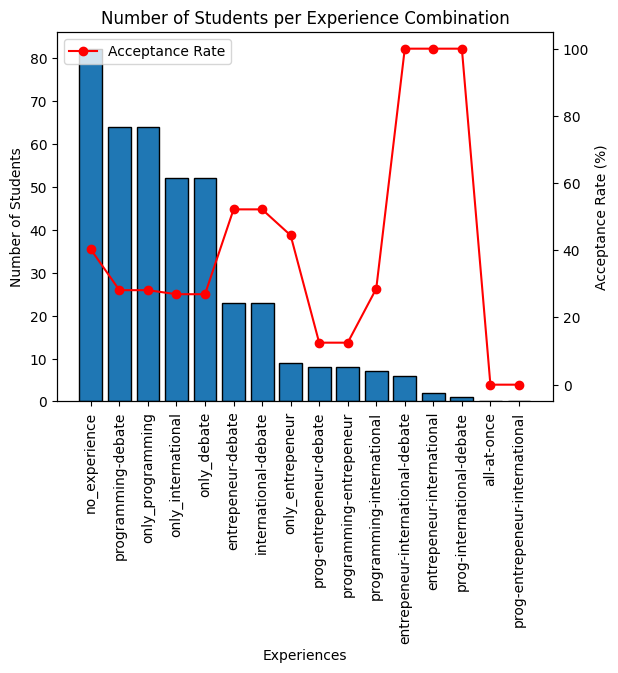

In [444]:
#plot acceptance rates for different experiences
plt.title("Number of Students per Experience Combination")
plt.xlabel("Experiences")
plt.ylabel("Number of Students")
plt.bar(df_exp['experiences'], df_exp['num_of_students'], edgecolor='black')
plt.xticks(rotation=90)

ax2 = plt.twinx()
ax2.plot(df_exp['acceptance_rate'].values, color='r', marker='o', label='Acceptance Rate')
ax2.set_ylabel('Acceptance Rate (%)')
ax2.legend(loc='upper left')

plt.show()

In [445]:
#Create a new dataframe for the purpose of graphing ages and acceptance rates
employees = df.copy()
employees = employees[employees['decision'] == True]
# employees.head()

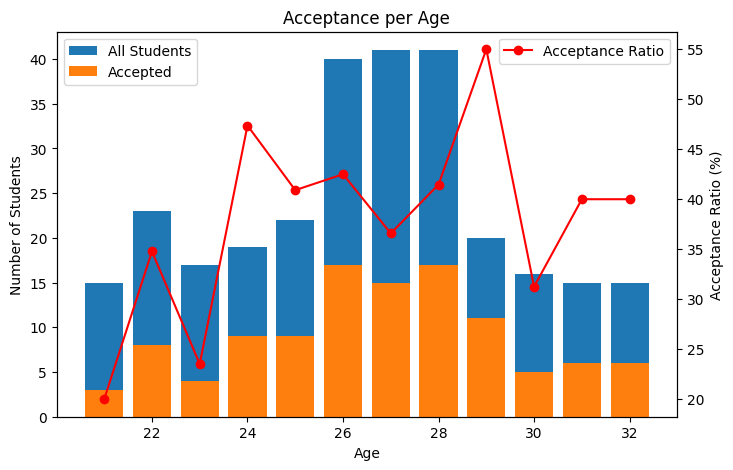

In [446]:
#count the number of (hired) students for each age
df_age_counts = df['age'].value_counts()
employees_age_counts = employees['age'].value_counts()

#calculate ratio of accepted students per age
acceptance_ratio = employees_age_counts / df_age_counts * 100

#plot acceptance rates per age
plt.figure(figsize=(8, 5))
plt.bar(df['age'].value_counts().index, df['age'].value_counts().values)
plt.bar(employees['age'].value_counts().index, employees['age'].value_counts().values)
plt.xlabel('Age')
plt.ylabel('Number of Students')
plt.title('Acceptance per Age')
plt.legend(['All Students', 'Accepted'], loc='upper left')

ax2 = plt.twinx()
ax2.plot(acceptance_ratio.index, acceptance_ratio.values, color='r', marker='o', label='Acceptance Ratio')
ax2.set_ylabel('Acceptance Ratio (%)')
ax2.legend(loc='upper right')

plt.show()

**Important note about graph above**

There is something important to mention here. The population is nearly split into three groups here. Firstly, the ages 26 - 28 are clearly the ones applying the most for this job. Most acceptances also happen in these three ages. That being said, ages 24 and 29 are the most likely to be accepted by far. This is interesting becasue the number of applicants younger than 26 is usually around the same for each age. On the other end of that spectrum, ages 21 and 23 are by far the least likely to be accepted.

I believe that this group of applicants at age 29 should be studied further.

In [447]:
#remove all rows where the gender value is 'other'
dfgenders = dfmain[dfmain['gender'] != 'other'].copy()

Text(0.5, 0, 'gender')

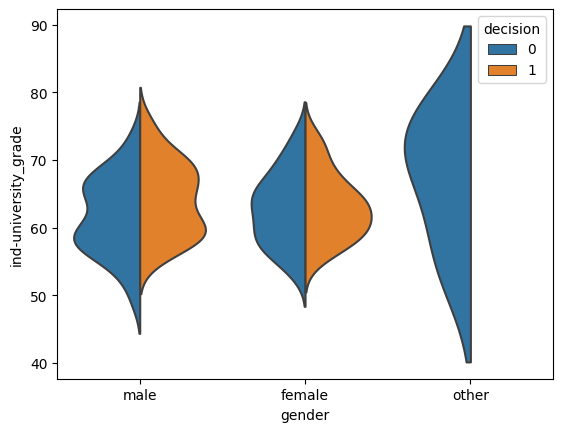

In [448]:
'''NOTE THAT I DO NOT YET FULLY KNOW WHICH VIOLINPLOTS WE WANT EXACTLY'''

#Plot a violinplot
dfgenders["all"] = ""
ax = sns.violinplot(x = "gender", y="ind-university_grade", hue = 'decision', data = dfmain, split=True, inner=None)
ax.set_xlabel("gender")

In [449]:
#make a copy of the dataframe and count how many rows decision==True for each unique grade
dfgrades = dfmain.copy()
dfgrades = dfgrades[dfgrades['decision'] == True]

#get the counts of instances for each unique grade in total
dfcounts1 = pd.DataFrame()
dfcounts2 = pd.DataFrame()
dfcounts1[['allgrades', 'all']] = df['ind-university_grade'].value_counts().to_frame().reset_index()
dfcounts2[['acceptedgrades', 'accepted']] = dfgrades['ind-university_grade'].value_counts().to_frame().reset_index()

#sort the values of both allgrades and acceptedgrades in ascending order
dfcounts1 = dfcounts1.sort_values(by=['allgrades'])
dfcounts2 = dfcounts2.sort_values(by=['acceptedgrades'])

#reset the indexes to the current order
dfcounts2 = pd.concat([dfcounts2, pd.DataFrame(0, columns=['accepted'], index=range(4))], ignore_index=True)
dfcounts2 = dfcounts2.shift(4)

#merge the datasets on index
dfcounts1.reset_index(drop=True, inplace=True)
dfcounts = pd.concat([dfcounts1, dfcounts2], axis=1)

#create a new column with the ratio of accepted/total
dfcounts['ratio'] = dfcounts['accepted']/dfcounts['all']

#replace all NaN values with 0
dfcounts = dfcounts.fillna(0)



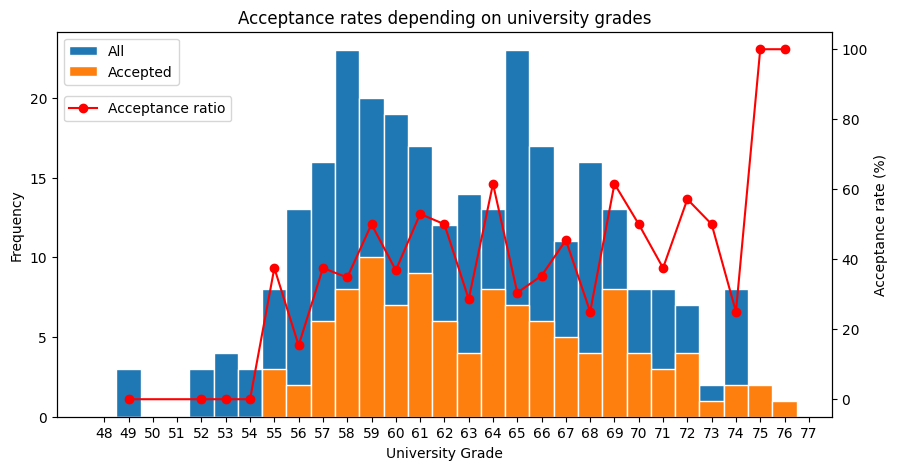

In [450]:
#plot the histogram
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()
bin = np.arange(48, 78, 1)

ax1.hist(dfmain['ind-university_grade'], bins=bin, edgecolor = 'white', width = 1, align='left')
ax1.hist(dfgrades['ind-university_grade'], bins=bin, edgecolor = 'white', width = 1, align='left')
ax1.set_ylabel("Frequency")
ax1.legend(["All", "Accepted"], loc='upper left', bbox_to_anchor=(0.0, 1.0))

#plot a line for the ratio
ax2.plot(dfcounts['allgrades'], dfcounts['ratio']*100, 'o-', color='red')
ax2.legend(["Acceptance ratio"], loc='center left', bbox_to_anchor=(0.0, 0.8))
ax2.set_ylabel("Acceptance rate (%)")

plt.xticks(np.arange(48, 78, 1))
ax1.set_xlabel("University Grade")
plt.title("Acceptance rates depending on university grades")

plt.show()

In [471]:
#create a subset of the data to be used for a decision tree
dftree = dfmain.copy()
dftree.drop(['Id', 'gender', 'sport', 'ind-languages', 'company', 'ind-exact_study'], axis=1, inplace=True)

#encode non useable data to useful form
dftree = pd.get_dummies(dftree, columns=['nationality'], drop_first=True)
labelencoder = LabelEncoder()
dftree['ind-degree'] = labelencoder.fit_transform(dftree['ind-degree'])

#separate the data into features and classes
dftreefeatures = dftree.copy()
dftreeclasses = dftree['decision']
dftreefeatures.drop(['decision'], axis=1, inplace=True)

         Id  gender  age nationality    sport  ind-university_grade  \
0    x6077a    male   26      German     Golf                    67   
1    x2173b    male   24       Dutch  Cricket                    70   
2    x6241a  female   26      German     Golf                    59   
3    x5785d  female   27       Dutch   Tennis                    63   
4    x9859f    male   28       Dutch  Cricket                    63   
..      ...     ...  ...         ...      ...                   ...   
279  x8998a    male   27       Dutch  Cricket                    76   
280  x3664a    male   28       Dutch   Tennis                    68   
281  x2659d    male   30       Dutch   Tennis                    54   
282  x3164f    male   28       Dutch  Cricket                    57   
283  x6907b    male   25       Dutch   Tennis                    65   

     ind-debateclub  ind-programming_exp  ind-international_exp  \
0                 0                    1                      0   
1            

In [452]:
#split the set into training, validation and testing sets
X_train, X_test, y_train, y_test = tts(dftreefeatures, dftreeclasses, test_size=0.3, stratify= dftreeclasses)
X_train, X_val, y_train, y_val = tts(X_train, y_train, test_size=0.2, stratify=y_train)

#turn the data into lists (for usability)
y_train = y_train.tolist()
y_val = y_val.tolist()
y_test = y_test.tolist()

In [453]:
#Iteratively find the best hyperparameters for the decision tree (at least according to sklearn)
def findhp(n):
    for _ in range(n):
        param_grid = {'criterion': ['gini', 'entropy'],
                    'max_depth': [None, 1, 2, 3, 4, 5, 10, 20]}
        grid = gsCV(DecisionTreeClassifier(), param_grid, cv=5)
        grid.fit(X_train, y_train)

        print("Best hyperparameters:", grid.best_params_)

findhp(5)

Best hyperparameters: {'criterion': 'gini', 'max_depth': 2}
Best hyperparameters: {'criterion': 'gini', 'max_depth': 2}
Best hyperparameters: {'criterion': 'entropy', 'max_depth': 20}
Best hyperparameters: {'criterion': 'entropy', 'max_depth': 20}
Best hyperparameters: {'criterion': 'gini', 'max_depth': 2}


In [454]:
#Evaluate the results, calculate accuracy, precision and recall for both hired and not hired students
def evalresults(actual, predicted):
    #convert predicted into a normal list
    predicted = predicted.tolist()

    correct = 0
    Tpcorrect = 0
    Trcorrect = 0
    Fpcorrect = 0
    Frcorrect = 0

    #count the number of true's in the actual set
    true = actual.count(True)

    #calculate the precision and recall for each class
    for i in range(len(actual)):
        if predicted[i] == True and actual[i] == True:
            correct += 1
            Tpcorrect += 1
            Trcorrect += 1
        elif predicted[i] == False and actual[i] == False:
            correct += 1
            Fpcorrect += 1
            Frcorrect += 1
        
    print("Accuracy:", correct/len(actual))
    print("Precision (True):", Tpcorrect/predicted.count(True))
    print("Recall (True):", Trcorrect/true)
    print("Precision (False):", Fpcorrect/predicted.count(False))
    print("Recall (False):", Frcorrect/(len(actual)-true))

In [455]:
#initialize the tree
clf = DecisionTreeClassifier(criterion='gini', max_depth=10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [456]:
#predict the classes for the validation set
y_pred = clf.predict(X_val)

#evaluate the results
evalresults(y_val, y_pred)

Accuracy: 0.55
Precision (True): 0.45
Recall (True): 0.5625
Precision (False): 0.65
Recall (False): 0.5416666666666666


[Text(0.6075, 0.9545454545454546, 'x[6] <= 0.5\ngini = 0.474\nsamples = 158\nvalue = [97, 61]'),
 Text(0.355, 0.8636363636363636, 'x[3] <= 0.5\ngini = 0.388\nsamples = 95\nvalue = [70, 25]'),
 Text(0.23, 0.7727272727272727, 'x[1] <= 54.5\ngini = 0.458\nsamples = 62\nvalue = [40, 22]'),
 Text(0.21, 0.6818181818181818, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.25, 0.6818181818181818, 'x[0] <= 26.5\ngini = 0.488\nsamples = 52\nvalue = [30, 22]'),
 Text(0.14, 0.5909090909090909, 'x[2] <= 0.5\ngini = 0.4\nsamples = 29\nvalue = [21, 8]'),
 Text(0.1, 0.5, 'x[0] <= 25.5\ngini = 0.255\nsamples = 20\nvalue = [17, 3]'),
 Text(0.08, 0.4090909090909091, 'x[0] <= 24.5\ngini = 0.337\nsamples = 14\nvalue = [11, 3]'),
 Text(0.04, 0.3181818181818182, 'x[1] <= 61.5\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.02, 0.22727272727272727, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.06, 0.22727272727272727, 'x[1] <= 63.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.04, 0.13

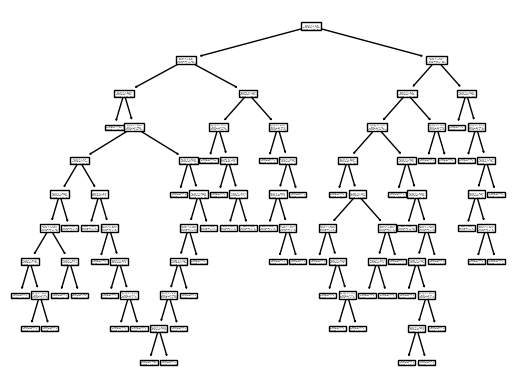

In [457]:
#print the tree
tree.plot_tree(clf)

In [458]:
#Test the tree on the test set to view actual performance
y_pred = clf.predict(X_test)
evalresults(y_test, y_pred)

Accuracy: 0.5813953488372093
Precision (True): 0.4634146341463415
Recall (True): 0.5757575757575758
Precision (False): 0.6888888888888889
Recall (False): 0.5849056603773585


In [459]:
#test it on the full set (for plotting purposes)
y_pred = clf.predict(dftreefeatures)
evalresults(dftreeclasses.tolist(), y_pred)

Accuracy: 0.7852112676056338
Precision (True): 0.7130434782608696
Recall (True): 0.7454545454545455
Precision (False): 0.834319526627219
Recall (False): 0.8103448275862069


In [460]:
dfpred = dfmain.copy()
dfpred['decision'] = y_pred

Comparative plots

In [461]:
df = dfpred.copy()

###################### All four experiences ######################

df['all-at-once'] = np.where((df['ind-programming_exp'] == True) & (df['ind-entrepeneur_exp'] == True) & (df['ind-international_exp'] == True) & (df['ind-debateclub'] == True), True, False)

###################### Exactly three experiences ######################

df['prog-entrepeneur-international'] = np.where((df['ind-programming_exp'] == True)
                                                & (df['ind-entrepeneur_exp'] == True) 
                                                & (df['ind-international_exp'] == True)
                                                & (df['ind-debateclub'] == False), True, False)
df['prog-entrepeneur-debate'] = np.where((df['ind-programming_exp'] == True)
                                                & (df['ind-entrepeneur_exp'] == True) 
                                                & (df['ind-international_exp'] == False)
                                                & (df['ind-debateclub'] == True), True, False)
df['prog-international-debate'] = np.where((df['ind-programming_exp'] == True)
                                                & (df['ind-entrepeneur_exp'] == False) 
                                                & (df['ind-international_exp'] == True)
                                                & (df['ind-debateclub'] == True), True, False)
df['entrepeneur-international-debate'] = np.where((df['ind-programming_exp'] == False)
                                                & (df['ind-entrepeneur_exp'] == True) 
                                                & (df['ind-international_exp'] == True)
                                                & (df['ind-debateclub'] == True), True, False)

###################### Exactly two experiences ######################

df['programming-entrepeneur'] = np.where((df['ind-programming_exp'] == True) 
                                                & (df['ind-entrepeneur_exp'] == True) 
                                                & (df['ind-international_exp'] == False)
                                                & (df['ind-debateclub'] == False ), True, False)
df['programming-international'] = np.where((df['ind-programming_exp'] == True)
                                                & (df['ind-entrepeneur_exp'] == False) 
                                                & (df['ind-international_exp'] == True) 
                                                & (df['ind-debateclub'] == False), True, False)
df['programming-debate'] = np.where((df['ind-programming_exp'] == True)
                                                & (df['ind-entrepeneur_exp'] == False) 
                                                & (df['ind-international_exp'] == False) 
                                                & (df['ind-debateclub'] == False), True, False)
df['entrepeneur-international'] = np.where((df['ind-programming_exp'] == False)
                                                & (df['ind-entrepeneur_exp'] == True) 
                                                & (df['ind-international_exp'] == True) 
                                                & (df['ind-debateclub'] == False), True, False)
df['entrepeneur-debate'] = np.where((df['ind-programming_exp'] == False)
                                                & (df['ind-entrepeneur_exp'] == True) 
                                                & (df['ind-international_exp'] == False) 
                                                & (df['ind-debateclub'] == True), True, False)
df['international-debate'] = np.where((df['ind-programming_exp'] == False)
                                                & (df['ind-entrepeneur_exp'] == True) 
                                                & (df['ind-international_exp'] == False) 
                                                & (df['ind-debateclub'] == True), True, False)

###################### No experience or only one experience ######################

df['no_experience'] = np.where((df['ind-programming_exp'] == False) 
                                                & (df['ind-entrepeneur_exp'] == False) 
                                                & (df['ind-international_exp'] == False) 
                                                & (df['ind-debateclub'] == False), True, False)
df['only_programming'] = np.where((df['ind-programming_exp'] == True) 
                                                & (df['ind-entrepeneur_exp'] == False) 
                                                & (df['ind-international_exp'] == False) 
                                                & (df['ind-debateclub'] == False), True, False)
df['only_entrepeneur'] = np.where((df['ind-programming_exp'] == False) 
                                                & (df['ind-entrepeneur_exp'] == True) 
                                                & (df['ind-international_exp'] == False) 
                                                & (df['ind-debateclub'] == False) , True, False)
df['only_international'] = np.where((df['ind-programming_exp'] == False) 
                                                & (df['ind-entrepeneur_exp'] == False) 
                                                & (df['ind-international_exp'] == True) 
                                                & (df['ind-debateclub'] == False), True, False)
df['only_debate'] = np.where((df['ind-programming_exp'] == False) 
                                                & (df['ind-entrepeneur_exp'] == False) 
                                                & (df['ind-international_exp'] == True) 
                                                & (df['ind-debateclub'] == False), True, False)

In [462]:
#create an empty dataframe for the purpose of graphing specific experiences
df_exp = pd.DataFrame(columns=['experiences', 'acceptance_rate', 'num_of_students', 'num_of_accepted_students'])

#function to calculate acceptance rates for each experience
def experience_acceptance_rates(df_exp):

    listOfColumns = ['all-at-once', 'prog-entrepeneur-international', 'prog-entrepeneur-debate', 'prog-international-debate', 'entrepeneur-international-debate', 'programming-entrepeneur', 'programming-international', 'entrepeneur-international', 'entrepeneur-debate', 'programming-debate', 'international-debate', 'only_programming', 'only_entrepeneur', 'only_international', 'only_debate', 'no_experience']

    # new dataframe
    

    for i in listOfColumns:
        if len(np.where(df[i] == True)[0]) == 0:
            #append to dataframe
            df_exp = pd.concat([df_exp, pd.Series({'experiences': i, 'acceptance_rate': ((df[(df[i] == True) & (df['decision'] == True)].shape[0])*100), 'num_of_students': df[(df[i] == True)].shape[0], 'num_of_accepted_students': 0}).to_frame().T], ignore_index=True)
        else:
            #append to dataframe
            df_exp = pd.concat([df_exp, pd.Series({'experiences': i, 'acceptance_rate': (((df[(df[i] == True) & (df['decision'] == True)].shape[0])/(df[(df[i] == True)].shape[0]))*100), 'num_of_students': df[(df[i] == True)].shape[0], 'num_of_accepted_students': 5}).to_frame().T], ignore_index=True)

    return df_exp

df_exp = experience_acceptance_rates(df_exp)

#sort by acceptance rate
df_exp = df_exp.sort_values(by=['num_of_students'], ascending=False)
# df_exp.head()

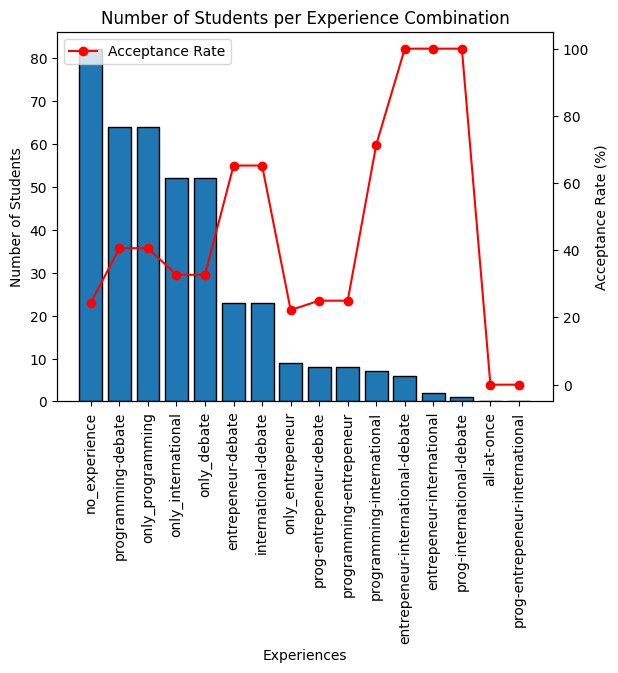

In [463]:
#plot acceptance rates for different experiences
plt.title("Number of Students per Experience Combination")
plt.xlabel("Experiences")
plt.ylabel("Number of Students")
plt.bar(df_exp['experiences'], df_exp['num_of_students'], edgecolor='black')
plt.xticks(rotation=90)

ax2 = plt.twinx()
ax2.plot(df_exp['acceptance_rate'].values, color='r', marker='o', label='Acceptance Rate')
ax2.set_ylabel('Acceptance Rate (%)')
ax2.legend(loc='upper left')

plt.show()

In [464]:
#Create a new dataframe for the purpose of graphing ages and acceptance rates
employees = df.copy()
employees = employees[employees['decision'] == True]
# employees.head()

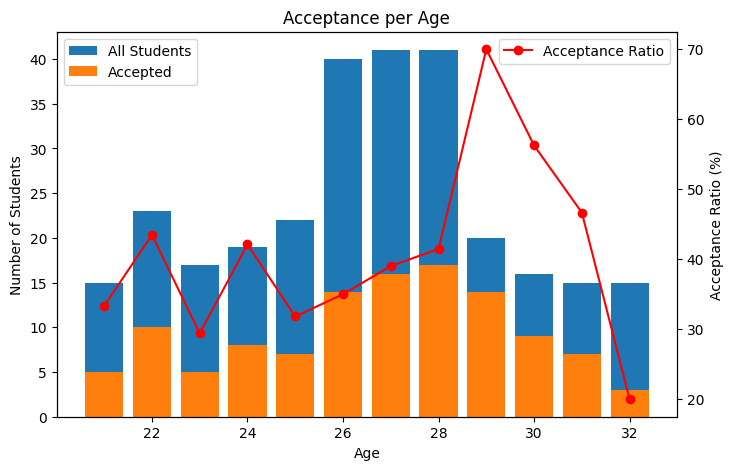

In [465]:
#count the number of (hired) students for each age
df_age_counts = df['age'].value_counts()
employees_age_counts = employees['age'].value_counts()

#calculate ratio of accepted students per age
acceptance_ratio = employees_age_counts / df_age_counts * 100

#plot acceptance rates per age
plt.figure(figsize=(8, 5))
plt.bar(df['age'].value_counts().index, df['age'].value_counts().values)
plt.bar(employees['age'].value_counts().index, employees['age'].value_counts().values)
plt.xlabel('Age')
plt.ylabel('Number of Students')
plt.title('Acceptance per Age')
plt.legend(['All Students', 'Accepted'], loc='upper left')

ax2 = plt.twinx()
ax2.plot(acceptance_ratio.index, acceptance_ratio.values, color='r', marker='o', label='Acceptance Ratio')
ax2.set_ylabel('Acceptance Ratio (%)')
ax2.legend(loc='upper right')

plt.show()

In [466]:
#remove all rows where the gender value is 'other'
dfgenders = dfpred[dfpred['gender'] != 'other'].copy()

Text(0.5, 0, 'gender')

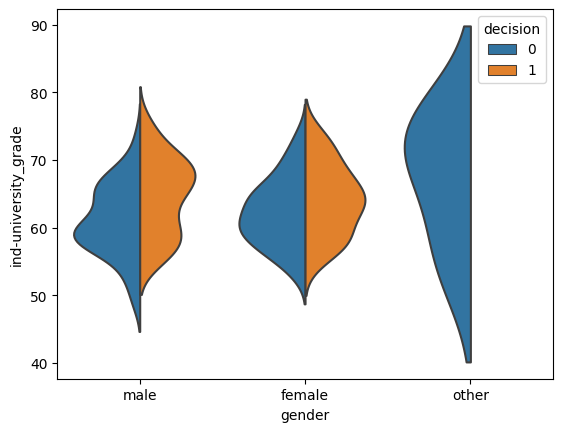

In [467]:
'''NOTE THAT I DO NOT YET FULLY KNOW WHICH VIOLINPLOTS WE WANT EXACTLY'''

#Plot a violinplot
dfgenders["all"] = ""
ax = sns.violinplot(x = "gender", y="ind-university_grade", hue = 'decision', data = df, split=True, inner=None)
ax.set_xlabel("gender")

In [468]:
#make a copy of the dataframe and count how many rows decision==True for each unique grade
dfgrades = dfpred.copy()
dfgrades = dfgrades[dfgrades['decision'] == True]

#get the counts of instances for each unique grade in total
dfcounts1 = pd.DataFrame()
dfcounts2 = pd.DataFrame()
dfcounts1[['allgrades', 'all']] = df['ind-university_grade'].value_counts().to_frame().reset_index()
dfcounts2[['acceptedgrades', 'accepted']] = dfgrades['ind-university_grade'].value_counts().to_frame().reset_index()

#sort the values of both allgrades and acceptedgrades in ascending order
dfcounts1 = dfcounts1.sort_values(by=['allgrades'])
dfcounts2 = dfcounts2.sort_values(by=['acceptedgrades'])

#reset the indexes to the current order
dfcounts2 = pd.concat([dfcounts2, pd.DataFrame(0, columns=['accepted'], index=range(4))], ignore_index=True)
dfcounts2 = dfcounts2.shift(4)

#merge the datasets on index
dfcounts1.reset_index(drop=True, inplace=True)
dfcounts = pd.concat([dfcounts1, dfcounts2], axis=1)

#create a new column with the ratio of accepted/total
dfcounts['ratio'] = dfcounts['accepted']/dfcounts['all']

#replace all NaN values with 0
dfcounts = dfcounts.fillna(0)


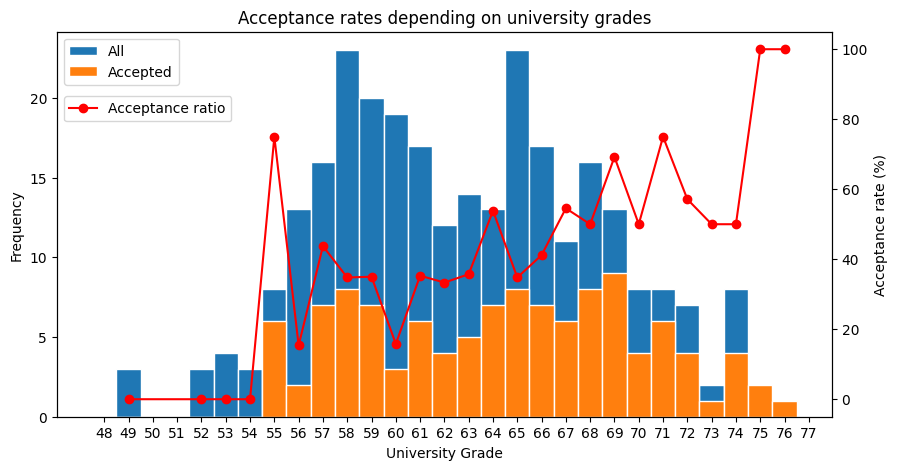

In [469]:
#plot the histogram
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()
bin = np.arange(48, 78, 1)

ax1.hist(dfmain['ind-university_grade'], bins=bin, edgecolor = 'white', width = 1, align='left')
ax1.hist(dfgrades['ind-university_grade'], bins=bin, edgecolor = 'white', width = 1, align='left')
ax1.set_ylabel("Frequency")
ax1.legend(["All", "Accepted"], loc='upper left', bbox_to_anchor=(0.0, 1.0))

#plot a line for the ratio
ax2.plot(dfcounts['allgrades'], dfcounts['ratio']*100, 'o-', color='red')
ax2.legend(["Acceptance ratio"], loc='center left', bbox_to_anchor=(0.0, 0.8))
ax2.set_ylabel("Acceptance rate (%)")

plt.xticks(np.arange(48, 78, 1))
ax1.set_xlabel("University Grade")
plt.title("Acceptance rates depending on university grades")

plt.show()